# Dataquest | Linear Regression For Machine Learning<br/> <br/> Project Title: Predicting House Sales Prices

## 1) Introduction

#### Background:

Provided by: [Dataquest.io](https://www.dataquest.io/)

We'll practise linear regression techniques in this project.

We'll work with housing data for the city of Ames, Iowa, United States from 2006 to 2010. We can read more about why the data was collected [here](https://www.tandfonline.com/doi/abs/10.1080/10691898.2011.11889627). We can also read about the different columns in the data [here](https://s3.amazonaws.com/dq-content/307/data_description.txt).

The data was originally compiled by [Dean De Cock](https://www.truman.edu/faculty-staff/decock/) for the primary purpose of having a high quality dataset for regression. The data can be downloaded [here](https://dsserver-prod-resources-1.s3.amazonaws.com/235/AmesHousing.txt).

This is the pipeline of functions that will let us quickly iterate on different functions on the dataset, to train and output the error terms for our comparisions on which linear regression models and inputs works better.
- transform_features()
- select features()
- train_and_test()


In [1]:
# import libraries
import pandas as pd  # Dataframe manipulation
import numpy as np  # Arrays manipulation
import matplotlib.pyplot as plt
import seaborn as sns  # for correlation heatmap if needed
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error


df = pd.read_csv('AmesHousing.tsv', sep='\t')

# review
print(df.info())
df

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2930 entries, 0 to 2929
Data columns (total 82 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Order            2930 non-null   int64  
 1   PID              2930 non-null   int64  
 2   MS SubClass      2930 non-null   int64  
 3   MS Zoning        2930 non-null   object 
 4   Lot Frontage     2440 non-null   float64
 5   Lot Area         2930 non-null   int64  
 6   Street           2930 non-null   object 
 7   Alley            198 non-null    object 
 8   Lot Shape        2930 non-null   object 
 9   Land Contour     2930 non-null   object 
 10  Utilities        2930 non-null   object 
 11  Lot Config       2930 non-null   object 
 12  Land Slope       2930 non-null   object 
 13  Neighborhood     2930 non-null   object 
 14  Condition 1      2930 non-null   object 
 15  Condition 2      2930 non-null   object 
 16  Bldg Type        2930 non-null   object 
 17  House Style   

,Order,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,...,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,Sale Condition,SalePrice
0,1,526301100,20,RL,141.0,31770,Pave,NaN,IR1,Lvl,...,0,NaN,NaN,NaN,0,5,2010,WD,Normal,215000
1,2,526350040,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,...,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal,105000
2,3,526351010,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,...,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal,172000
3,4,526353030,20,RL,93.0,11160,Pave,NaN,Reg,Lvl,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,244000
4,5,527105010,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,...,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal,189900
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2925,2926,923275080,80,RL,37.0,7937,Pave,NaN,IR1,Lvl,...,0,NaN,GdPrv,NaN,0,3,2006,WD,Normal,142500
2926,2927,923276100,20,RL,NaN,8885,Pave,NaN,IR1,Low,...,0,NaN,MnPrv,NaN,0,6,2006,WD,Normal,131000
2927,2928,923400125,85,RL,62.0,10441,Pave,NaN,Reg,Lvl,...,0,NaN,MnPrv,Shed,700,7,2006,WD,Normal,132000
2928,2929,924100070,20,RL,77.0,10010,Pave,NaN,Reg,Lvl,...,0,NaN,NaN,NaN,0,4,2006,WD,Normal,170000


In [2]:
# only select univarate feature to test out function
def select_features(train):
    features = ['Gr Liv Area', 'SalePrice']
    return train[features]

def transform_features(train):
    return train

# since 2930 rows, we split dataset into approximately half - training and test sets
def train_and_test(df):
    train = df[:1460].copy()
    test = df[1460:].copy()
    target = 'SalePrice'
    train_set = select_features(train)
    train_set = transform_features(train_set)
    test_set = select_features(test)
    test_set = transform_features(test_set)
    features = train_set.columns.drop(target)
    
    lr = LinearRegression()
    lr.fit(train_set[features], train_set[target])
    test_predictions = lr.predict(test_set[features])
    test_rmse = np.sqrt(mean_squared_error(test_set[target], test_predictions))
    return round(test_rmse, 0)

# return rmse value on test set
print('Average rmse: {:,}'.format(train_and_test(df)))
print('Average sale price: {:,}'.format(round(df.mean()['SalePrice'],0)))

Average rmse: 57,088.0
Average sale price: 180,796.0


#### Findings (Introduction):
Based on our initial train and test model using a univariate model (linear regression) on the feature **'Gr Living Area'** to predict the housing sales price, the mean error term, measured in root mean squared error (rmse) is 57,088 which we would use as a benchmark for finetuning subsequent models to reduce the error term.

We would also use the average sale price in the datasets to guage the prediction effectiveness of the linear regression models.

## 2) Feature Engineering / Feature Selection

Provided by: [Dataquest.io](https://www.dataquest.io/)

Let's now start removing features with many missing values, diving deeper into potential categorical features, and transforming text and numerical columns. Update **transform_features()** so that any column from the data frame with more than 25% (or another cutoff value) missing values is dropped. 

We also need to remove any columns that leak information about the sale (e.g. like the year the sale happened). In general, the goal of this function is to:
- remove features that we don't want to use in the model, just based on the number of missing values or data leakage
- transform features into the proper format (numerical to categorical, scaling numerical, filling in missing values, etc)
- create new features by combining other features

We can also get more familiar with the remaining columns by reading the data documentation for each column, determining what transformations are necessary (if any), and more.

Succeeding in predictive modeling (and competitions like Kaggle) is highly dependent on the quality of features the model has. Libraries like scikit-learn have made it quick and easy to simply try and tweak many different models, but cleaning, selecting, and transforming features are still more of an art that requires a bit of human ingenuity.

In [3]:
# review numeric features in dataset
train = df[:1460].copy()
numeric_train = train.select_dtypes(include=['int64', 'float64'])
print(numeric_train.columns)
print(numeric_train.head())
print(numeric_train.dtypes)

Index(['Order', 'PID', 'MS SubClass', 'Lot Frontage', 'Lot Area',
       'Overall Qual', 'Overall Cond', 'Year Built', 'Year Remod/Add',
       'Mas Vnr Area', 'BsmtFin SF 1', 'BsmtFin SF 2', 'Bsmt Unf SF',
       'Total Bsmt SF', '1st Flr SF', '2nd Flr SF', 'Low Qual Fin SF',
       'Gr Liv Area', 'Bsmt Full Bath', 'Bsmt Half Bath', 'Full Bath',
       'Half Bath', 'Bedroom AbvGr', 'Kitchen AbvGr', 'TotRms AbvGrd',
       'Fireplaces', 'Garage Yr Blt', 'Garage Cars', 'Garage Area',
       'Wood Deck SF', 'Open Porch SF', 'Enclosed Porch', '3Ssn Porch',
       'Screen Porch', 'Pool Area', 'Misc Val', 'Mo Sold', 'Yr Sold',
       'SalePrice'],
      dtype='object')
   Order        PID  MS SubClass  Lot Frontage  Lot Area  Overall Qual  \
0      1  526301100           20         141.0     31770             6   
1      2  526350040           20          80.0     11622             5   
2      3  526351010           20          81.0     14267             6   
3      4  526353030           2

In [4]:
%%html
<style>
table {align:left;display:block}  # to align html tables to left
</style> 

#### Findings:

Based on review of the dataset, we also identify the following features that are currently classified as numeric (float/int) but are actually categorial in nature or irrelevant in our analysis.

We would exclude them from our numeric analysis below when selecting features to train.

If relevant, we would also consider them as categorial data, when transforming categorial data to dummy coding later to include them into our linear regression prediction model.

Features | Analyst Comment | Description
--- | --- | ---
Order | Sequential, irrelevant to analysis | Order ID
PID | Sequential, irrelevant to analysis | Product ID
MS SubClass | Categorial | Identifies the type of dwelling involved in the sale.
Lot Frontage | Continuous | Linear feet of street connected to property
Lot Area | Continuous | Lot size in square feet
Overall Qual | Categorial | Rates the overall material and finish of the house
Overall Cond | Categorial | Rates the overall condition of the house
Year Built | Datetime | Original construction date
Year Remod/Add | Datetime | Remodel date (same as construction date if no remodeling or additions)
Mas Vnr Area | Continuous | Masonry veneer area in square feet
BsmtFin SF 1 | Continuous | Type 1 finished square feet
BsmtFin SF 2 | Continuous | Type 2 finished square feet
Bsmt Unf SF | Continuous | Unfinished square feet of basement area
Total Bsmt SF | Continuous | Total square feet of basement area
1st Flr SF | Continuous | First Floor square feet
2nd Flr SF | Continuous | Second floor square feet
Low Qual Fin SF | Continuous | Low quality finished square feet (all floors)
Gr Liv Area | Continuous | Above grade (ground) living area square feet
Bsmt Full Bath | Discrete | Basement full bathrooms
Bsmt Half Bath | Discrete | Basement half bathrooms
Full Bath | Discrete | Full bathrooms above grade
Half Bath | Discrete | Half baths above grade
Bedroom AbvGr | Discrete | Bedrooms above grade (does NOT include basement bedrooms)
Kitchen AbvGr | Discrete | Kitchens above grade
TotRms AbvGrd | Discrete | Total rooms above grade (does not include bathrooms)
Fireplaces | Discrete | Number of fireplaces
Garage Yr Blt | Datetime | Year garage was built
Garage Cars | Discrete | Size of garage in car capacity
Garage Area | Continuous | Size of garage in square feet
Wood Deck SF | Continuous | Wood deck area in square feet
Open Porch SF | Continuous | Open porch area in square feet
Enclosed Porch | Continuous | Enclosed porch area in square feet
3Ssn Porch | Continuous | Three season porch area in square feet
Screen Porch | Continuous | Screen porch area in square feet
Pool Area | Continuous | Pool area in square feet
Misc Val | Continuous (for analysis purposes) | Value of miscellaneous feature (USD)
Mo Sold | Datetime | Month Sold (MM)
Yr Sold | Datetime | Year Sold (YYYY)

**Re-cap: Filtering out the continuous / discrete variables**


Feature | Type | Suggested treatment
--- | --- | ---
Order | Sequential, irrelevant to analysis | Drop
PID | Sequential, irrelevant to analysis | Drop
MS SubClass | Categorial | Reserve for categorial analysis
Overall Qual | Categorial | Reserve for categorial analysis
Overall Cond | Categorial | Reserve for categorial analysis
Year Built | Datetime | Reserve for feature engineering or drop
Year Remod/Add | Datetime | Reserve for feature engineering or drop
Garage Yr Blt | Datetime | Reserve for feature engineering or drop
Mo Sold | Datetime | Reserve for feature engineering or drop
Yr Sold | Datetime | Reserve for feature engineering or drop


#### Features transformation

We also want to identify features that can be transformed that can contribute to predicting house sales prices. 

Based on context, from year built till years till sold or years till remod may be relevant to determining sales prices.

In [5]:
# only select features that are numeric since only numeric features can be computed for linear regression purposes
# additionally by discretion, drop numeric features that is not meaningful to linear regression
def select_features(train):
    # added transformation of years features directly in the full dataset
    df['years_till_remod'] = (df['Year Remod/Add'] - df['Year Built']).astype(int)
    df['years_till_sold'] = df['Yr Sold'] - df['Year Built'].astype(int)
    
    cols_string = ['MS SubClass', 'Overall Qual', 'Overall Cond']
    train[cols_string] = train[cols_string].astype(dtype=str)
    numeric_train = train.select_dtypes(include=['int64', 'float64'])
    cols_drop = ['Order', 'PID', 'Year Built', 'Year Remod/Add', 'Garage Yr Blt', 'Mo Sold', 'Yr Sold']
    numeric_train.drop(labels=cols_drop, axis=1, inplace=True)
    return numeric_train

def transform_features(train):
    # null_percentage: returns percentage of null values in each category
    # less_null_index: return index of those features which has less than defined null percentage
    # then return the filtered dataset
    null_percentage = round(train.isnull().sum() / len(train) * 100, 1)
    less_null_index = null_percentage[null_percentage < 25.0].index
    train_set = train[less_null_index]   
    
    # for those remaining categories with null values, fillna() with mean
    train_set.fillna(train_set.mean(), inplace=True)

    return train_set

train = df[:1460].copy()
train_set = select_features(train)
train_set = transform_features(train_set)
train_set

/Users/humphreytan/opt/anaconda3/lib/python3.8/site-packages/pandas/core/frame.py:4308: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


,Lot Frontage,Lot Area,Mas Vnr Area,BsmtFin SF 1,BsmtFin SF 2,Bsmt Unf SF,Total Bsmt SF,1st Flr SF,2nd Flr SF,Low Qual Fin SF,...,Garage Cars,Garage Area,Wood Deck SF,Open Porch SF,Enclosed Porch,3Ssn Porch,Screen Porch,Pool Area,Misc Val,SalePrice
0,141.000000,31770,112.0,639.0,0.0,441.0,1080.0,1656,0,0,...,2.0,528.0,210,62,0,0,0,0,0,215000
1,80.000000,11622,0.0,468.0,144.0,270.0,882.0,896,0,0,...,1.0,730.0,140,0,0,0,120,0,0,105000
2,81.000000,14267,108.0,923.0,0.0,406.0,1329.0,1329,0,0,...,1.0,312.0,393,36,0,0,0,0,12500,172000
3,93.000000,11160,0.0,1065.0,0.0,1045.0,2110.0,2110,0,0,...,2.0,522.0,0,0,0,0,0,0,0,244000
4,74.000000,13830,0.0,791.0,0.0,137.0,928.0,928,701,0,...,2.0,482.0,212,34,0,0,0,0,0,189900
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,68.928984,10316,0.0,735.0,0.0,257.0,992.0,992,873,0,...,3.0,839.0,0,184,0,0,0,0,0,235000
1456,68.928984,10400,227.0,0.0,0.0,1257.0,1257.0,1290,871,0,...,2.0,570.0,0,84,0,0,0,0,0,230500
1457,73.000000,9066,320.0,668.0,0.0,336.0,1004.0,1004,848,0,...,3.0,660.0,224,106,0,0,0,0,0,230000
1458,75.000000,11404,202.0,252.0,0.0,901.0,1153.0,1153,878,0,...,2.0,541.0,192,84,0,0,0,0,0,222500


/Users/humphreytan/opt/anaconda3/lib/python3.8/site-packages/pandas/core/frame.py:4308: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


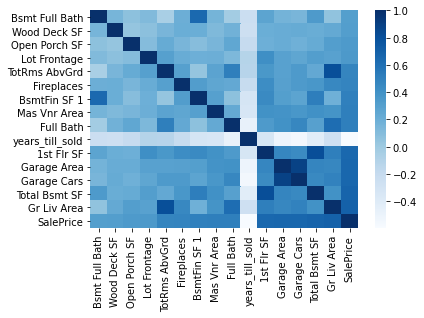

Features with at least mild correlation with Sale Price (>0.3):
 Bsmt Full Bath     0.314358
Wood Deck SF       0.319104
Open Porch SF      0.344383
Lot Frontage       0.349361
TotRms AbvGrd      0.483701
Fireplaces         0.485683
BsmtFin SF 1       0.512870
Mas Vnr Area       0.516299
Full Bath          0.518194
years_till_sold    0.592273
1st Flr SF         0.657119
Garage Area        0.662397
Garage Cars        0.663485
Total Bsmt SF      0.682651
Gr Liv Area        0.698990
SalePrice          1.000000
Name: SalePrice, dtype: float64


In [6]:
# now let's further explore which features have higher correlation with sale price, hence to keep them in the linear regression model
# we also want to watch out for features with potential collinearity (features that correlate with each other) which risk duplicating information - we can drop one of the duplicate feature
# we can explore this with a seaborn heatmap applied on a sorted and filtered correlation table

train = df[:1460].copy()
train_set = select_features(train)
train_set = transform_features(train_set)

sorted_corrs = train_set.corr()['SalePrice'].abs().sort_values()
strong_corrs = sorted_corrs[sorted_corrs > 0.3]
corrmat = train_set[strong_corrs.index].corr()
sns.heatmap(corrmat, cmap="Blues")
plt.show()
print('Features with at least mild correlation with Sale Price (>0.3):\n', strong_corrs)

#### Pair of Features with strong correlation (collinearity)

From above - we identify the following pair with strong correlation (collinearity) and reflects similiar information
- **TotRms AbvGrd** and **Gr Liv Area** (number of rooms vs living area of rooms)
- **Garage Area** and **Garage Cars** (area of garage vs number of cars)
- **Bsmt Full Bath** and **BsmtFin SF 1** (number of bathrooms vs area of bathrooms)

As such, we decide to keep features that are continuous variables that may capture more nuance, and drop their counterparts as below.
- **TotRms AbvGrd**
- **Garage Cars**
- **Bsmt Full Bath**

In [13]:
# modifying and updating the functions again (drop one of each pair of variable with high collinearity as suggested above)
def select_features(df_):
    # added transformation of years features directly in the full dataset
    df_['years_till_remod'] = (df_['Year Remod/Add'] - df_['Year Built']).astype(int)
    df_['years_till_sold'] = df_['Yr Sold'] - df_['Year Built'].astype(int)
    
    # turn these variables into string since they are categorial
    cols_string = ['MS SubClass', 'Overall Qual', 'Overall Cond']
    df_[cols_string] = df_[cols_string].astype(dtype=str)
    
    numeric_df = df_.select_dtypes(include=['int64', 'float64'])
    # to also drop 'TotRms AbvGrd', 'Garage Cars', 'Bsmt Full Bath'
    cols_drop = ['PID', 'Year Built', 'Year Remod/Add', 'Garage Yr Blt', 'Mo Sold', 'Yr Sold', 'TotRms AbvGrd', 'Garage Cars', 'Bsmt Full Bath']
    numeric_df.drop(labels=cols_drop, axis=1, inplace=True)
    
    sorted_corrs = numeric_df.corr()['SalePrice'].abs().sort_values()
    weak_corrs_index = sorted_corrs[sorted_corrs <= 0.3].index
    numeric_df.drop(labels=weak_corrs_index, axis=1, inplace=True)
    
    return numeric_df

def transform_features(df_):
    null_percentage = round(df_.isnull().sum() / len(df_) * 100, 1)
    less_null_index = null_percentage[null_percentage < 25.0].index
    df_set = df_[less_null_index]   
    
    # for those remaining categories with null values, fillna() with mean
    df_set.fillna(train_set.mean(), inplace=True)
    return df_set

In [14]:
# since 2930 rows, we split dataset into approximately half - training and test sets
def train_and_test(df_):
    df_set = select_features(df_)
    df_set = transform_features(df_set)
    target = 'SalePrice'
    features = df_set.columns.drop(target)

    # rescaling the unit_train data before computing variance to remove low variance feature
    df_set_normal = df_set[features].copy()
    for feature in features:
        max_ = df_set[feature].max()
        min_ = df_set[feature].min()    
        df_set_normal[feature] = df_set[feature].apply(lambda x: (x - min_) / (max_ - min_))
    print(df_set_normal.var().sort_values())  # review features' variance
    print(df_set_normal.describe())  # review successful rescaling; value is between 0 to 1
    # after review variability, we decide to remove the 2 bottom ranked features
    col_drop = ['Lot Frontage', 'Open Porch SF']
    features = features.drop(col_drop)
    
    train_set = df_set[:1460].copy()
    test_set = df_set[1460:].copy()
    lr = LinearRegression()
    lr.fit(train_set[features], train_set[target])
    test_predictions = lr.predict(test_set[features])
    test_rmse = np.sqrt(mean_squared_error(test_set[target], test_predictions))
    return test_rmse

# return rmse value on test set
print('Average rmse: {:,}'.format(train_and_test(df)))
print('Average sale price: {:,}'.format(round(df.mean()['SalePrice'],0)))


Total Bsmt SF      0.005199
Lot Frontage       0.005332
BsmtFin SF 1       0.006514
1st Flr SF         0.006775
Wood Deck SF       0.007874
Open Porch SF      0.008272
Gr Liv Area        0.009070
Mas Vnr Area       0.012433
Full Bath          0.019109
Garage Area        0.020879
Fireplaces         0.026238
years_till_sold    0.048887
dtype: float64
       Lot Frontage  Mas Vnr Area  BsmtFin SF 1  Total Bsmt SF   1st Flr SF  \
count   2930.000000   2930.000000   2930.000000    2930.000000  2930.000000   
mean       0.164983      0.063689      0.078425       0.172113     0.173400   
std        0.073020      0.111505      0.080707       0.072101     0.082313   
min        0.000000      0.000000      0.000000       0.000000     0.000000   
25%        0.133562      0.000000      0.000000       0.129787     0.113894   
50%        0.164140      0.000000      0.065645       0.162029     0.157530   
75%        0.195205      0.101719      0.130050       0.213011     0.220542   
max        1.0000

/Users/humphreytan/opt/anaconda3/lib/python3.8/site-packages/pandas/core/frame.py:4308: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(
/Users/humphreytan/opt/anaconda3/lib/python3.8/site-packages/pandas/core/frame.py:4308: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


#### Findings (Feature Engineering / Selection):

For the current model, average rmse has decreased to xx,xxx from 57,088 when comparing back to the initial univariate model with single feature **'Gr Liv Area'**, indicating better predictive powers.

#### Treating categorial data:

For the categorial data, we can potentially dummy code the training and testing data then select the features that give good predictive powers.

One potential strategy could be to only focus on categorial data with good predictive powers.

However, the challenge is that this method would return many columns back, where the attributes may or may not be correlated to the sales price.

We can potentially solve this with existing python libraries that work with categorial analysis.


**Categorial data recap**


Feature
---
MS SubClass
Overall Qual
Overall Cond
MS Zoning
Street
Alley
Lot Shape
Land Contour
Utilities
Lot Config
Land Slope
Neighborhood
Condition 1
Condition 2
Bldg Type
House Style


In [ ]:
df['Alley'].value_counts()

In [ ]:
df.columns

In [ ]:
df.info()